In [1]:
import glob
import sys
sys.path.append('/root/apps/Clusgym_DRL-Ag6Pd5Cu4')
from generate_descriptors import Generate_acsf_descriptor, Generate_soap_descriptor
import matplotlib.pyplot as plt
import seaborn as sns
from asap3 import EMT
import numpy as np
import os

In [2]:
#save_path = os.path.join(self.traj_dir, '%d_%f_%f_%f_%d_%d_%d_full.traj' %(self.episodes, self.minima['energies'][self.min_idx], self.initial_energy, self.episode_reward, self.n_tot_all_minima, self.n_lower_energy_minima, self.n_unique_minima))

for i, file in enumerate(glob.glob('/root/apps/Clusgym_DRL-Ag6Pd5Cu4/result_Ag6Pd5Cu4/trajs/8048_-1.388934_9.974393_3123.276804_12_5_26_full.traj')):
    print(i, file)

0 /root/apps/Clusgym_DRL-Ag6Pd5Cu4/result_Ag6Pd5Cu4/trajs/8048_-1.388934_9.974393_3123.276804_12_5_26_full.traj


In [3]:
def generate_traj_plot(fname, cif = True):
    traj = Trajectory(fname)
    print(len(traj))
    ene_list = []
    
    cif_dir = f'/root/apps/Clusgym_DRL-Ag6Pd5Cu4/result_Ag6Pd5Cu4/cifs/'
    if not os.path.exists(cif_dir):
            os.makedirs(cif_dir)

    for i in range(len(traj)):
        img =  traj[i]
        img.calc = EMT()
        if i == 0:
            initial_energy = img.get_potential_energy()
    
        ene = img.get_potential_energy() - initial_energy
        print(i, ene)
        ene_list.append(ene)

        if cif == True:
            fname_split_list =  fname.split('/')
            #print(fname_split_list)
            cif_fname =  fname_split_list[0] + '/'+ fname_split_list[1] + '/cifs/' +   fname_split_list[2].split('full.traj')[0] +   str(i).zfill(3) +  '_'  + "{:.4f}".format(ene) + '.cif'
            #print(cif_fname)
            write(cif_fname, img, format='cif')

    n = len(ene_list)
    plt.figure()
    plt.plot(ene_list)
    plt.xlabel('episode time steps')
    plt.ylabel('$\Delta$ G (eV)')
    #plt.xlim([-1, n])
    # Set x-axis ticks to integer values
    #plt.xticks(np.arange(0, n+1, 2))  # Ticks from 0 to 10 at intervals of 1

    plt.show()
    

    
    return None

In [4]:
from ase.io.trajectory import Trajectory

0 /root/apps/Clusgym_DRL-Ag6Pd5Cu4/result_Ag6Pd5Cu4/trajs/8048_-1.388934_9.974393_3123.276804_12_5_26_full.traj
13
0 0.0
1 5.237469415320106e-05
2 -0.0006177789385208854
3 -0.00014140475036583666
4 -0.0014046899742616858
5 0.00354180753178035
6 -0.05000990149048157
7 -0.05027846265577729
8 -0.05087721340360929
9 -0.05026319959766923
10 -0.05073544770798577
11 -0.11875160507993598
12 -0.97914026269072


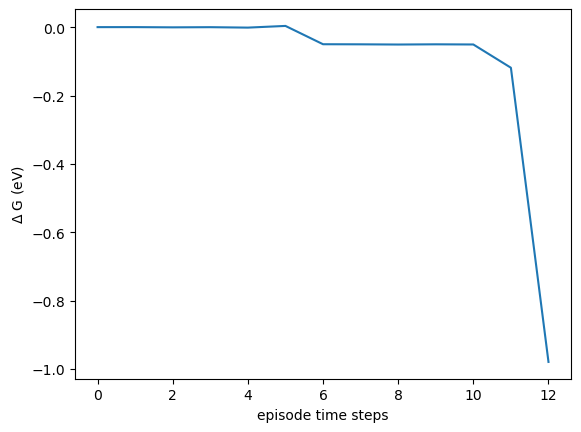

In [5]:
folder_path = '/root/apps/Clusgym_DRL-Ag6Pd5Cu4/result_Ag6Pd5Cu4/trajs/'
reg_selection = '8048_-1.388934_9.974393_3123.276804_12_5_26_full'
extension = '.traj'
traj_file_path = folder_path + reg_selection + '.traj'
for i, file in enumerate(glob.glob(traj_file_path)):
    print(i, file)
    generate_traj_plot(file, cif = False)

In [6]:
from ase.io import Trajectory

# Path to your .traj file
traj_file = "/root/apps/Clusgym_DRL-Ag6Pd5Cu4/result_Ag6Pd5Cu4/trajs/8048_-1.388934_9.974393_3123.276804_12_5_26_full.traj"

# Open the .traj file
traj = Trajectory(traj_file)

# Print the number of frames in the trajectory
print(f"Number of frames: {len(traj)}")

# Access all frames and print atomic information
for i, frame in enumerate(traj):
    print(f"Frame {i + 1}:")
    print(frame)

Number of frames: 13
Frame 1:
Atoms(symbols='Ag6Cu4Pd5', pbc=True, cell=[26.831716036353782, 23.638448188145652, 26.158637128784825], calculator=SinglePointCalculator(...))
Frame 2:
Atoms(symbols='Ag6Cu4Pd5', pbc=True, cell=[26.831716036353782, 23.638448188145652, 26.158637128784825], calculator=SinglePointCalculator(...))
Frame 3:
Atoms(symbols='Ag6Cu4Pd5', pbc=True, cell=[26.831716036353782, 23.638448188145652, 26.158637128784825], calculator=SinglePointCalculator(...))
Frame 4:
Atoms(symbols='Ag6Cu4Pd5', pbc=True, cell=[26.831716036353782, 23.638448188145652, 26.158637128784825], calculator=SinglePointCalculator(...))
Frame 5:
Atoms(symbols='Ag6Cu4Pd5', pbc=True, cell=[26.831716036353782, 23.638448188145652, 26.158637128784825], calculator=SinglePointCalculator(...))
Frame 6:
Atoms(symbols='Ag6Cu4Pd5', pbc=True, cell=[26.831716036353782, 23.638448188145652, 26.158637128784825], calculator=SinglePointCalculator(...))
Frame 7:
Atoms(symbols='Ag6Cu4Pd5', pbc=True, cell=[26.831716036353

In [7]:
for i, frame in enumerate(traj):
    print(f"Frame {i + 1} atomic positions:")
    print(frame.positions)

Frame 1 atomic positions:
[[15.16021175 14.17848259 12.88182562]
 [11.56388406 13.50975873  9.49837775]
 [12.33013679 11.14126237 10.69075392]
 [15.56475557  9.69297623 14.16743248]
 [10.06793612 10.21636977 11.96588296]
 [ 9.80680652 11.4564081   9.57561253]
 [12.83158808 13.49615759 11.78494093]
 [13.96116396 11.5125406  15.00035856]
 [13.0403417  13.6625474  14.24201643]
 [10.43075055 12.79085665 11.72737399]
 [14.40396505 11.59338722 12.49315074]
 [11.92852986 11.5476289  13.37513274]
 [16.55252522 12.12747687 13.90061219]
 [15.23759543 13.62510707 15.54301467]
 [16.10387999 11.27786838 16.26659482]]
Frame 2 atomic positions:
[[15.10645403 14.26013854 12.81145685]
 [11.58174256 13.4866779   9.35310305]
 [12.29261948 11.15946065 10.65143887]
 [15.4119125   9.73420465 13.99793489]
 [ 9.96741704 10.26245393 11.85003598]
 [ 9.83603069 11.42074984  9.40937263]
 [12.73084424 13.57775625 11.6926662 ]
 [13.7783749  11.48323971 14.98572425]
 [12.97996571 13.67296003 14.14371615]
 [10.351430

In [8]:
from ase.calculators.emt import EMT

# Assign a calculator to each frame
for frame in traj:
    frame.calc = EMT()  # Example: EMT calculator
    print(f"Potential energy: {frame.get_potential_energy()} eV")

Potential energy: 9.56459905746643 eV
Potential energy: 9.564651433851447 eV
Potential energy: 9.563981282103093 eV
Potential energy: 9.564457660295968 eV
Potential energy: 9.563194370591697 eV
Potential energy: 9.568140869406852 eV
Potential energy: 9.514589164569799 eV
Potential energy: 9.514320599967968 eV
Potential energy: 9.5137218514946 eV
Potential energy: 9.514335862597113 eV
Potential energy: 9.513863613464247 eV
Potential energy: 9.44584745510929 eV
Potential energy: 8.585458798908197 eV
